<a href="https://colab.research.google.com/github/lucasswolff/Data-Analysis-Projects/blob/main/World_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid cases, death and vaccination analysis**

**In this project, some data related to Covid-19 is analysed**:


*   A chart of the countries with more deaths is displayed
*   A world map chart is made using the deaths per million by each country
*   4 plots are made to compare the death, new cases and vaccination rate
*   A plot is made to compare the vaccination in Brazil, Europe, USA and China





In [ ]:
!mkdir -p '/content/drive/MyDrive/Colab Datasets/covid-world-data'

In [ ]:
!rm '/content/drive/MyDrive/Colab Datasets/covid-world-data/owid-covid-data.csv'

In [ ]:
!wget -P '/content/drive/MyDrive/Colab Datasets/covid-world-data' https://covid.ourworldindata.org/data/owid-covid-data.csv

--2022-01-24 10:39:41--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e989, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Datasets/covid-world-data/owid-covid-data.csv’

owid-covid-data.csv     [      <=>           ]  42.23M  39.9MB/s    in 1.1s    

2022-01-24 10:39:42 (39.9 MB/s) - ‘/content/drive/MyDrive/Colab Datasets/covid-world-data/owid-covid-data.csv’ saved [44282383]



In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 15.4 MB 44.3 MB/s 
     |████████████████████████████████| 6.3 MB 43.2 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime

In [ ]:
world_data_covid = pd.read_csv('/content/drive/MyDrive/Colab Datasets/covid-world-data/owid-covid-data.csv')

In [ ]:
world_data_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156769,ZWE,Africa,Zimbabwe,2022-01-19,226887.0,427.0,350.571,5266.0,8.0,7.286,15033.424,28.293,23.229,348.923,0.530,0.483,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6022.0,1811854.0,120.053,0.399,5188.0,0.344,0.0676,14.8,tests performed,7472553.0,4223110.0,3249443.0,NaN,14034.0,11654.0,49.51,27.98,21.53,NaN,772.0,5634.0,0.037,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156770,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,15077.486,44.063,23.361,349.585,0.663,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,1816276.0,120.346,0.293,4675.0,0.310,0.0754,13.3,tests performed,7483232.0,4228652.0,3254580.0,NaN,10679.0,10

In [ ]:
columns_selection = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older','gdp_per_capita', 'life_expectancy', 'human_development_index', 'hospital_beds_per_thousand']

In [ ]:
world_data_covid_selection = world_data_covid.filter(columns_selection)
world_data_covid_selection.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy,human_development_index,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83,0.511,0.5
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83,0.511,0.5
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83,0.511,0.5
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83,0.511,0.5
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,2.581,1803.987,64.83,0.511,0.5


In [ ]:
world_data_covid_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156774 entries, 0 to 156773
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   iso_code                             156774 non-null  object 
 1   continent                            147351 non-null  object 
 2   location                             156774 non-null  object 
 3   date                                 156774 non-null  object 
 4   total_cases                          153942 non-null  float64
 5   new_cases                            153846 non-null  float64
 6   total_deaths                         136504 non-null  float64
 7   new_deaths                           136647 non-null  float64
 8   total_cases_per_million              153225 non-null  float64
 9   new_cases_per_million                153129 non-null  float64
 10  total_deaths_per_million             135800 non-null  float64
 11  new_deaths_pe

**Death rank by contry**

In [ ]:
#Analysing the csv file I noticed that when the columns Continent is null, that means the data is about the whole continent (specified in the next column)
#The analysis is about each countries, not a whole country.

world_data_covid_selection.dropna(subset = ['continent'], inplace = True)

Text(0, 0.5, 'Number of Death')

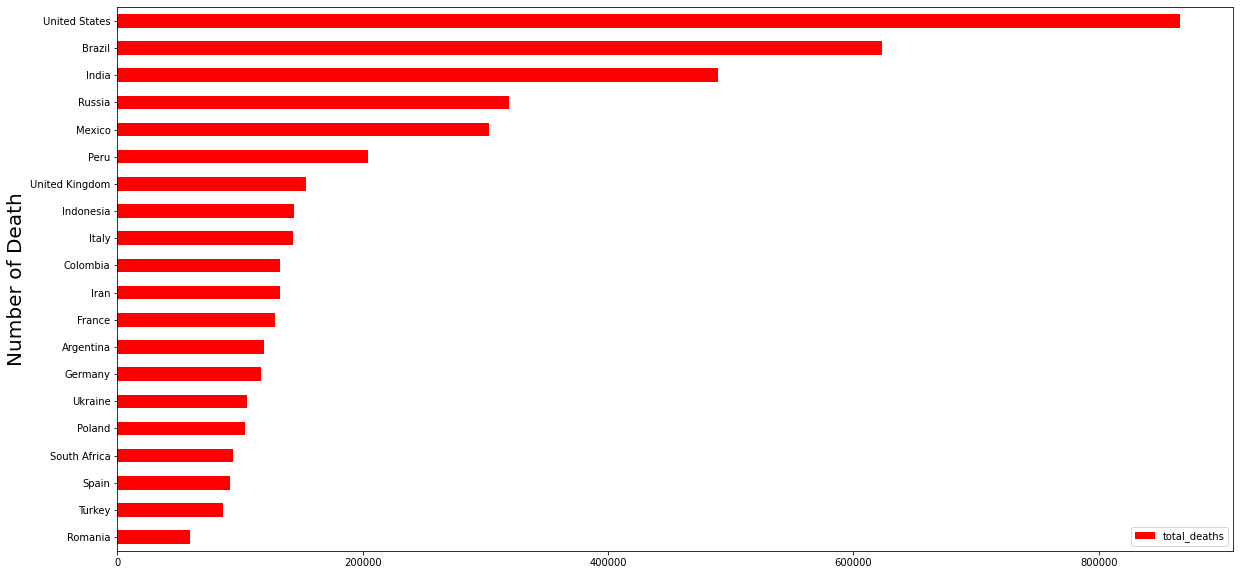

In [ ]:
covid_death = world_data_covid_selection.groupby(['location']).agg({'total_deaths':'last'}).sort_values(by = 'total_deaths' ).sort_values(by = 'total_deaths', ascending = False)
covid_death.dropna(inplace = True)
covid_death_top20 = covid_death.head(20)
covid_death_top20.plot(kind = 'barh', figsize = (20,10), color = 'r').invert_yaxis()
plt.ylabel("Country", size = 20)
plt.ylabel("Number of Death", size = 20)

**Deaths per Million World Map**

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#some contries had the wrong iso code
world.at[world[world['name']=='France'].index.item(),'iso_a3'] = 'FRA'
world.at[world[world['name']=='Norway'].index.item(),'iso_a3'] = 'NOR'
world.at[world[world['name']=='Kosovo'].index.item(),'iso_a3'] = 'OWID_KOS'

In [ ]:
covid_death_per_millon = world_data_covid_selection.groupby(['iso_code', 'location'], as_index=False).agg({'total_deaths_per_million':'last'}).sort_values(by = 'total_deaths_per_million' ).sort_values(by = 'total_deaths_per_million', ascending = False)
covid_death_per_millon.dropna(inplace = True)

In [ ]:
covid_death_per_millon_geo = world.merge(covid_death_per_millon, left_on = ['iso_a3'], right_on = ['iso_code'])
covid_death_per_millon_geo

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso_code,location,total_deaths_per_million
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,Fiji,850.593
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,Tanzania,12.244
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada,848.326
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States,2602.886
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,Kazakhstan,966.414
...,...,...,...,...,...,...,...,...,...
162,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,Serbia,1931.297
163,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,Montenegro,4001.267
164,1895250,Europe,Kosovo,OWID_KOS,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",OWID_KOS,Kosovo,1682.271
165,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,Trinidad and Tobago,2352.901


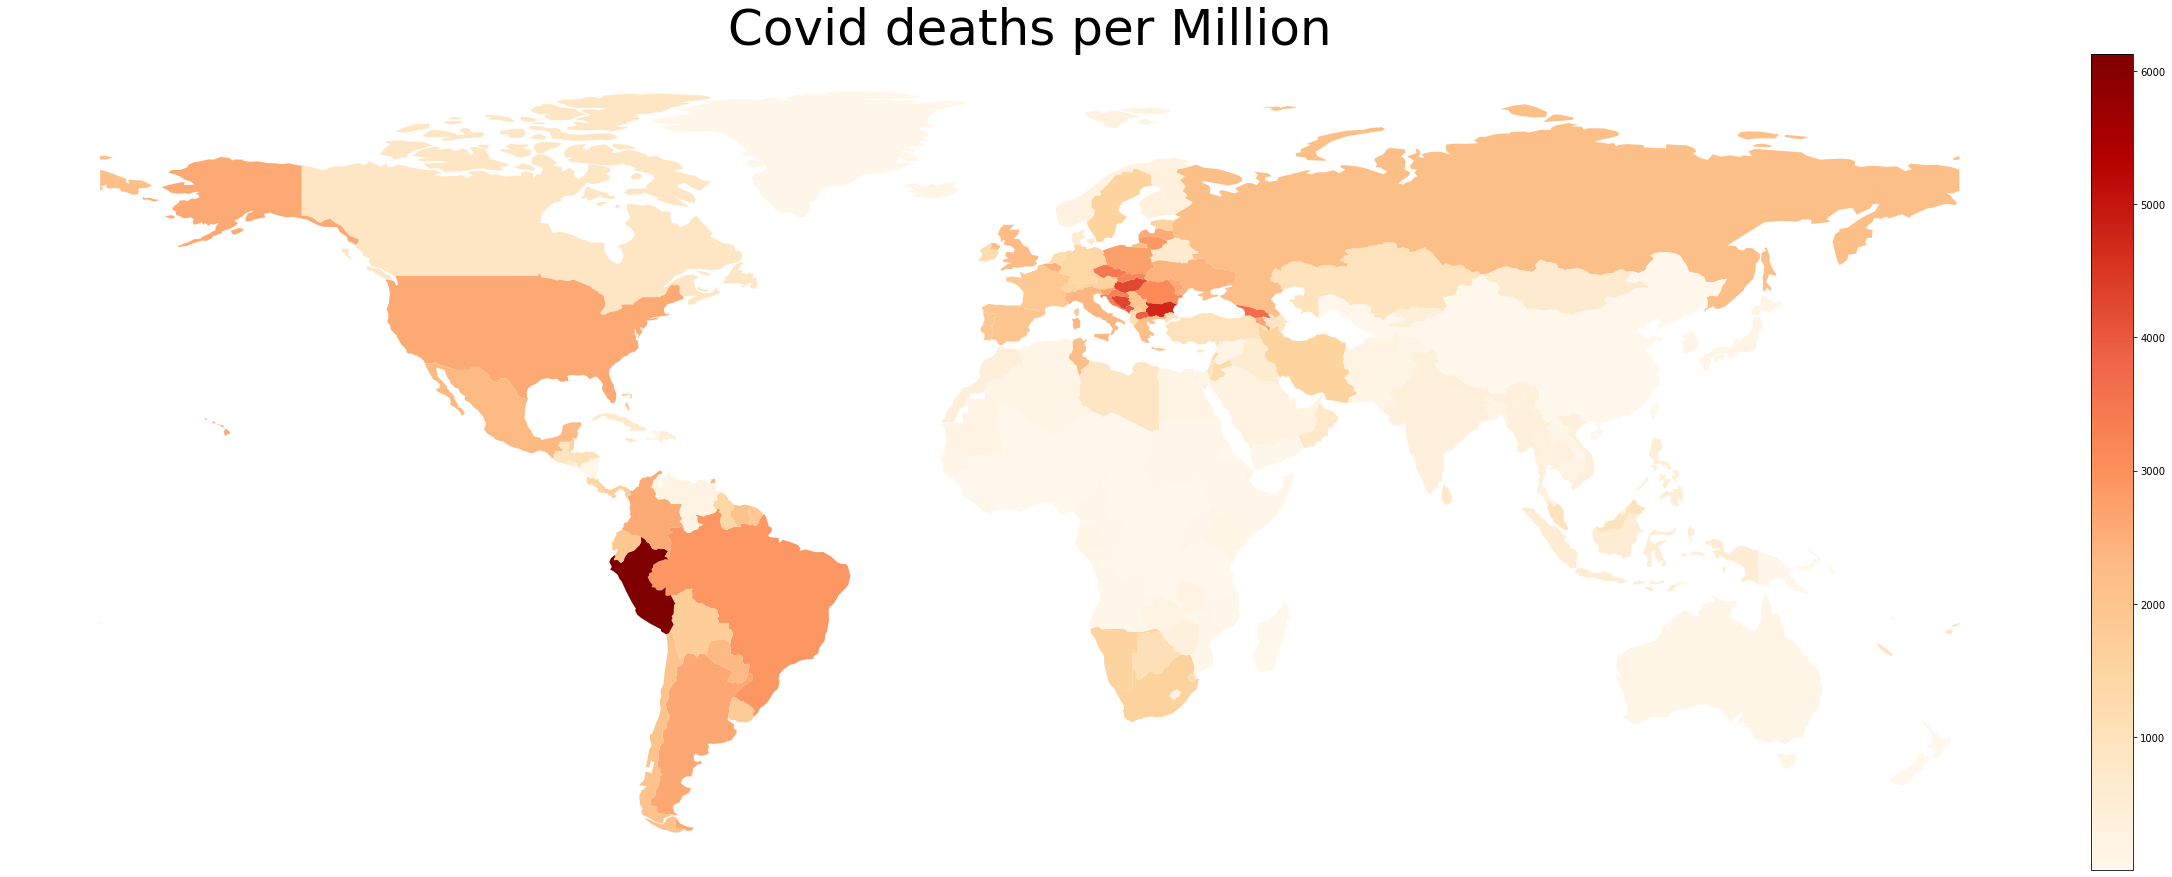

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1 , figsize=(60,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

covid_death_per_millon_geo.plot(column='total_deaths_per_million', ax=ax, cmap = 'OrRd', legend=True, cax=cax)
ax.set_title('Covid deaths per Million', size = 50)
ax.set_axis_off()

**Relation between vaccination, deaths, hospitalization and cases**

In [ ]:
columns_selection = ['iso_code', 'continent', 'location', 'date', 'new_cases_per_million', 'icu_patients_per_million', 'new_deaths_per_million',  'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred']
world_data_covid_selection = world_data_covid.filter(columns_selection)

In [ ]:
#converting column date into datetype
world_data_covid_selection['date'] =  pd.to_datetime(world_data_covid_selection['date'], format='%Y/%m/%d')

In [ ]:
#considering that when null, there was no death, case, hospitalization or vaccination 
number_columns = ['new_cases_per_million', 'icu_patients_per_million', 'new_deaths_per_million',  'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred']
for x in number_columns:
  world_data_covid_selection[x].fillna(0, inplace = True)


In [ ]:
brazil_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='Brazil']

In [ ]:
#There is an error in the vaccination in december 2021 and januanry 2022, some days the vaccination drops to zero. This code correct it using the previous non zero number

brazil_data_covid['people_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)
brazil_data_covid['people_fully_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)

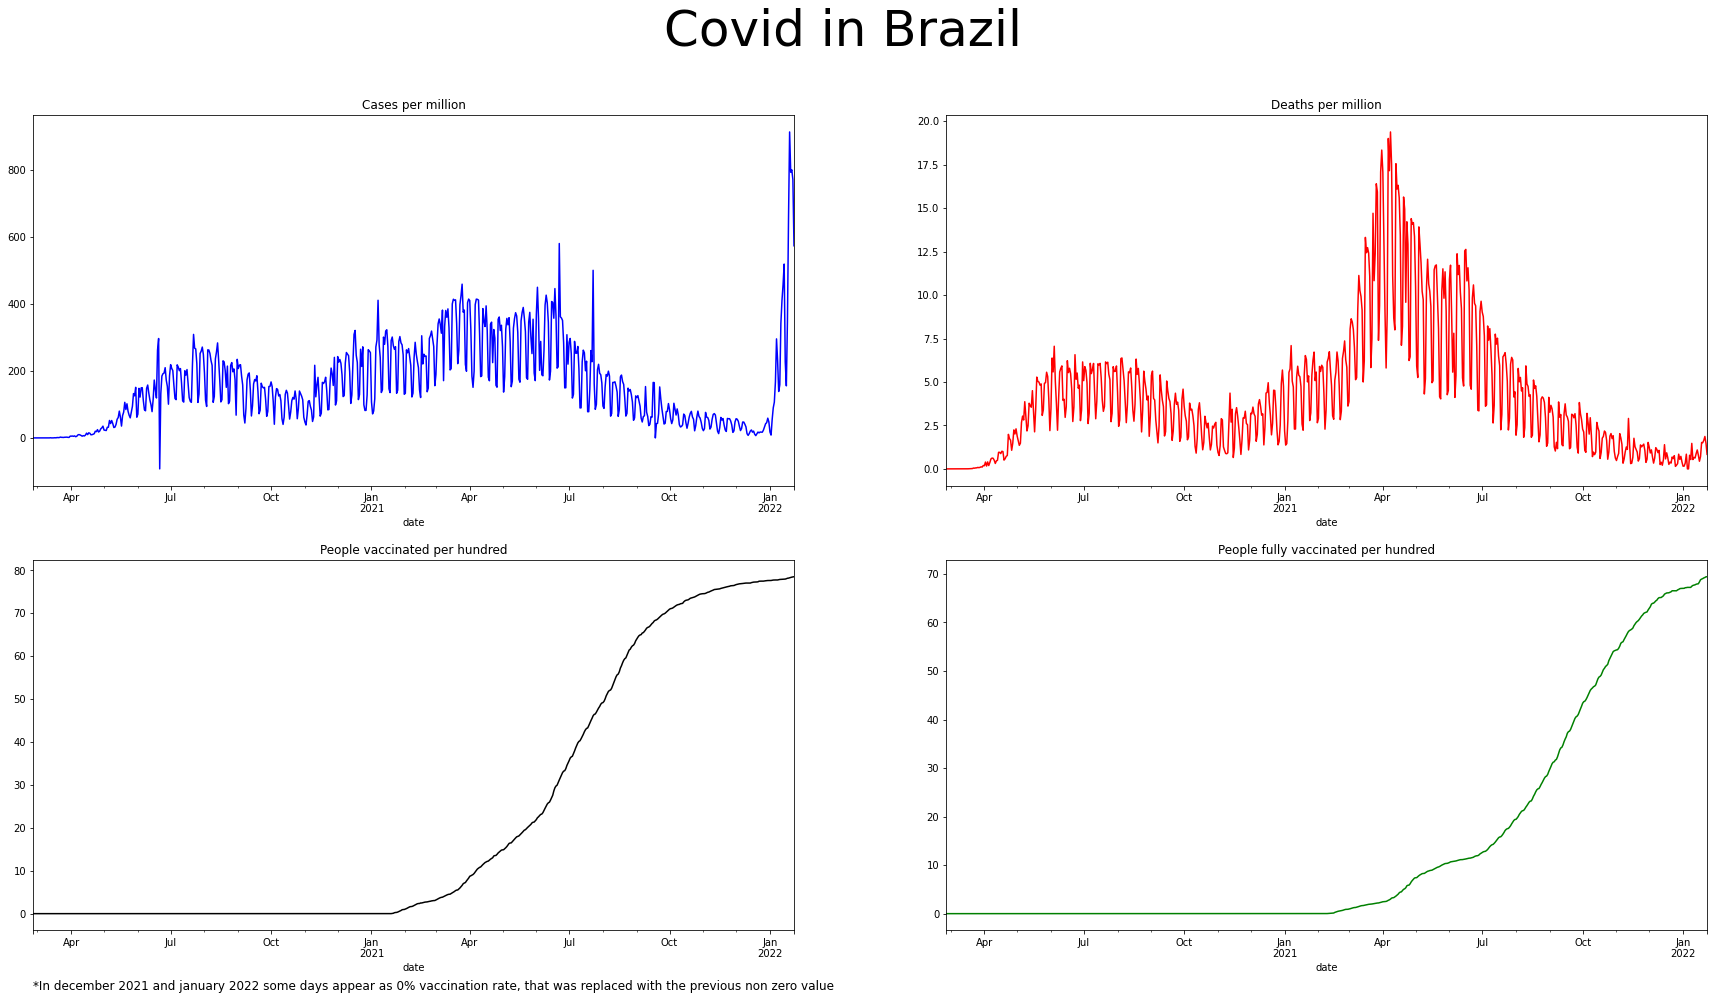

In [ ]:
fig1, ax = plt.subplots(2,2, figsize = (30,15))
fig1.suptitle("Covid in Brazil", size = 50)

ax1 = brazil_data_covid.plot(y = 'new_cases_per_million', x = 'date', color = 'b', ax = ax[0,0], title = 'Cases per million', legend = None)
ax2 = brazil_data_covid.plot(y = 'new_deaths_per_million', x = 'date', color = 'r', ax = ax[0,1], title = 'Deaths per million', legend = None)
ax3 = brazil_data_covid.plot(y = 'people_vaccinated_per_hundred', x = 'date', color = 'black', ax = ax[1,0], title = 'People vaccinated per hundred', legend = None)
ax4 = brazil_data_covid.plot(y = 'people_fully_vaccinated_per_hundred', x = 'date', color = 'g', ax = ax[1,1], title = 'People fully vaccinated per hundred', legend = None)

ax3.text(0,-0.16, "*In december 2021 and january 2022 some days appear as 0% vaccination rate, that was replaced with the previous non zero value", size=12, 
         transform=ax3.transAxes)

plt.show()



**Relation between vaccination and deaths**

In [ ]:
#Defining 4 dataset, one for Brazil, one for the USA, one for Eupore and one for the entire World

In [ ]:
world_data_covid_selection = world_data_covid_selection.filter(['continent', 'location', 'date', 'new_deaths_per_million',  'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred'])

In [ ]:
brazil_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='Brazil']
usa_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='United States']
china_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='China']
europe_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='Europe']
world_data_covid = world_data_covid_selection[world_data_covid_selection['location']=='World']

Text(0, -0.1, '*Wrong vaccination data was replaced by the previous value')

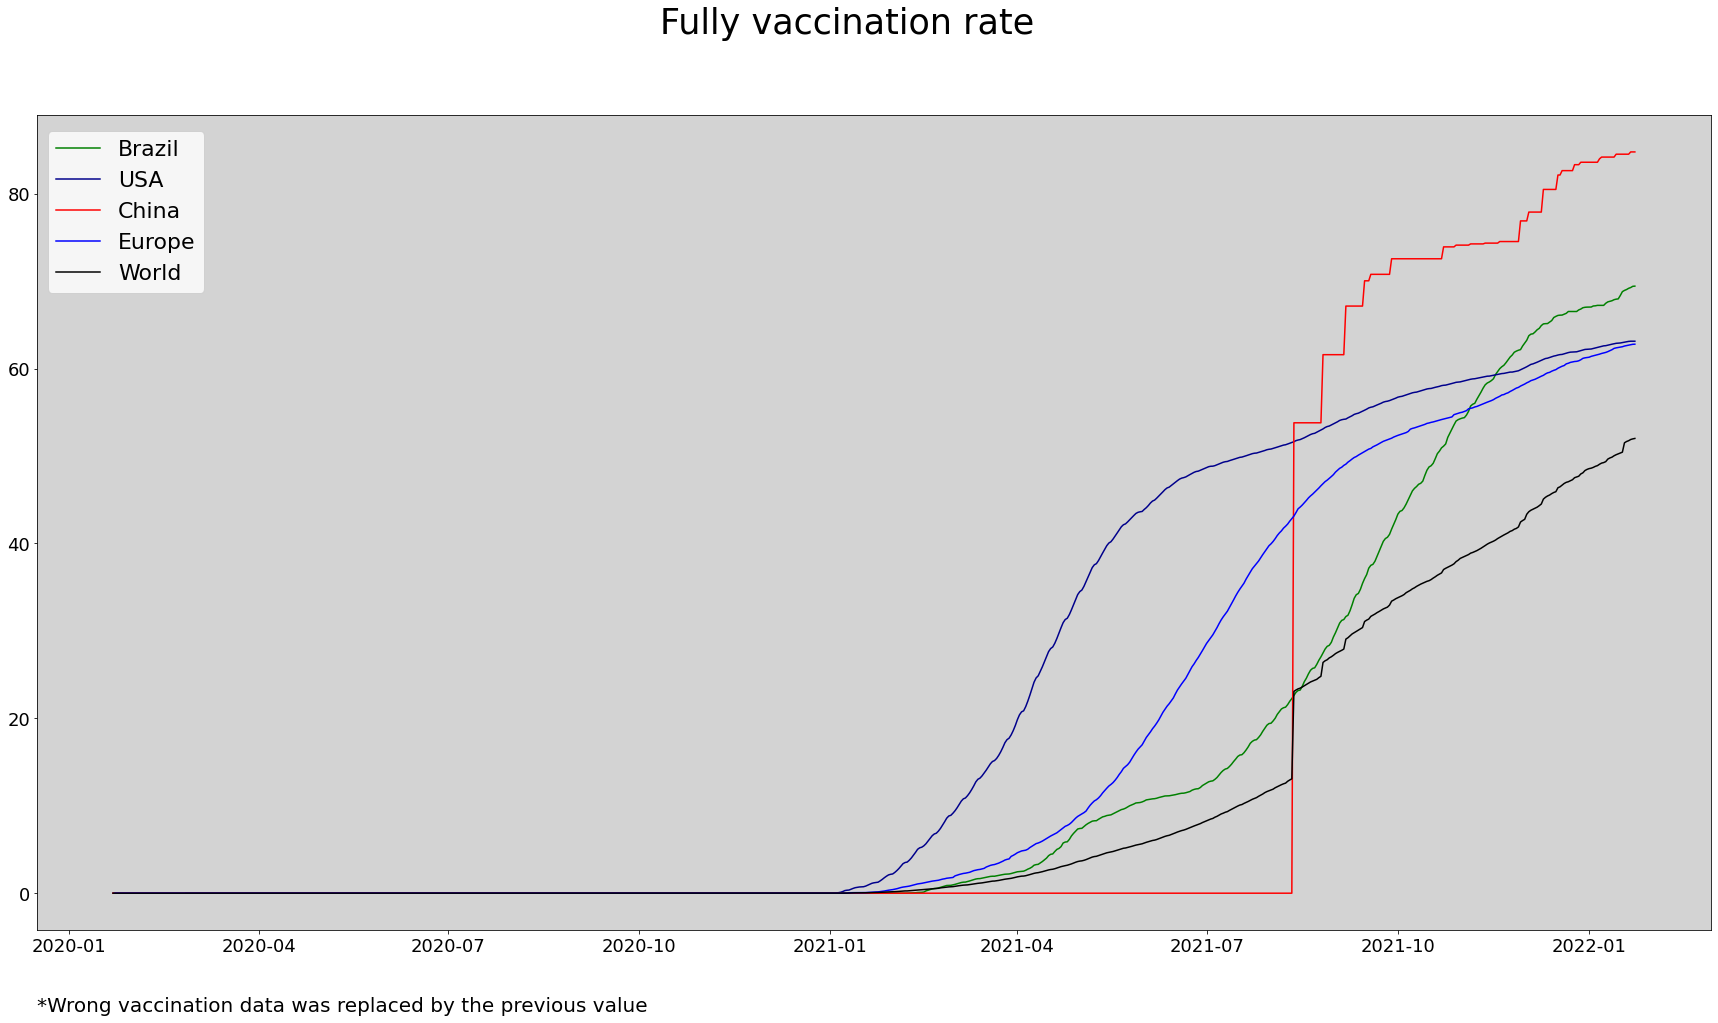

In [ ]:
#replacing wrong values
brazil_data_covid['people_fully_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)
usa_data_covid['people_fully_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)
china_data_covid['people_fully_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)

fig,ax = plt.subplots(figsize = (30,15))
fig.suptitle("Fully vaccination rate", size = 35)

ax.plot(brazil_data_covid['date'], brazil_data_covid['people_fully_vaccinated_per_hundred'], color = 'green', label = 'Brazil')
ax.plot(usa_data_covid['date'], usa_data_covid['people_fully_vaccinated_per_hundred'], color = 'darkblue', label = 'USA')
ax.plot(china_data_covid['date'], china_data_covid['people_fully_vaccinated_per_hundred'], color = 'red', label = 'China')
ax.plot(europe_data_covid['date'], europe_data_covid['people_fully_vaccinated_per_hundred'], color = 'blue', label = 'Europe')
ax.plot(world_data_covid['date'], world_data_covid['people_fully_vaccinated_per_hundred'], color = 'black', label = 'World')

plt.legend(fontsize = 22, bbox_to_anchor = (0.1,0.98), loc = 0, borderaxespad = 0)
ax.set_facecolor('lightgray')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.text(0,-0.1, "*Wrong vaccination data was replaced by the previous value", size=20, transform=ax.transAxes)

**Relation between vaccination and deaths**

Text(0, -0.1, '*Wrong vaccination data was replaced by the previous value')

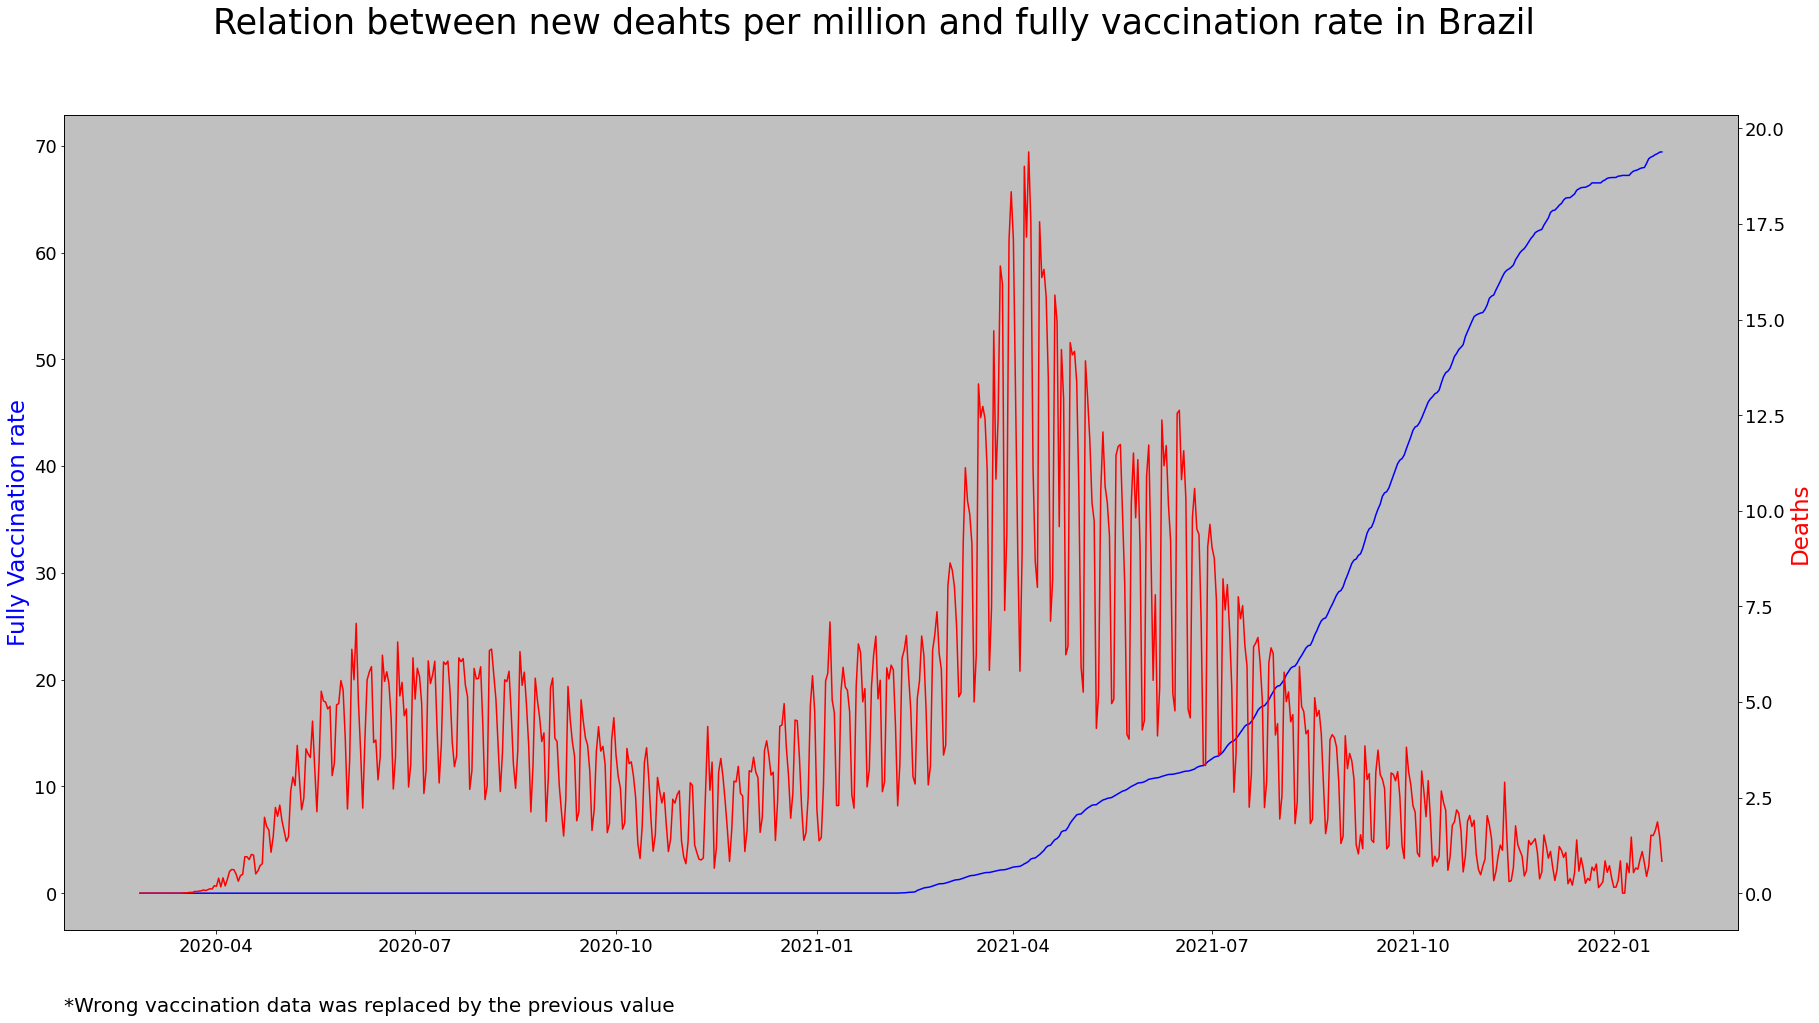

In [ ]:
#replacing wrong values
brazil_data_covid['people_fully_vaccinated_per_hundred'].replace(0, method='ffill', inplace=True)

#plotting
fig,ax = plt.subplots(figsize = (30,15))
fig.suptitle("Relation between new deahts per million and fully vaccination rate in Brazil", size = 35)

# x axis
ax.plot(brazil_data_covid.date, brazil_data_covid.people_fully_vaccinated_per_hundred, color='b')
plt.xticks(fontsize=18)

# y axis
ax.set_ylabel('Fully Vaccination rate', color='b', fontsize=23) 
plt.yticks(fontsize=18)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
plt.yticks(fontsize=18)
ax2.plot(brazil_data_covid.date, brazil_data_covid.new_deaths_per_million, color='r')
ax2.set_ylabel('Deaths', color='red', fontsize=23)

ax.set_facecolor('silver')

ax.text(0,-0.1, "*Wrong vaccination data was replaced by the previous value", size=20, transform=ax.transAxes)